# Part II - (Data Visualization of FordGoBike February 2019 Data)
## by (Agunoweh Timiebi)




## Investigation Overview


> The goal of this project is to illustrate the value and significance of data visualization techniques in the data analysis procedure. First, we perform the exploration and visualization in Python using well-known libraries like NumPy, pandas, Matplotlib, and Seaborn. The second part will then consist of a brief presentation that highlights an intriguing finding from our data.


## Dataset Overview

> This data collection contains details on each trip taken in a bike-sharing programme that serves the greater San Francisco Bay region. https://www.lyft.com/bikes/bay-wheels/system-data. For this initiative, February will be our only focus. <br>

The following information is included in the anonymised data for each trip: <br>

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import nbconvert

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('df_slide.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,duration_min,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,869.750000,38
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,1984,Male,No,Thursday,708.683333,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,1030.900000,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,608.166667,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thursday,26.416667,48


In [3]:
#Define a function for plot labels
def label(x,y,t):
    """
    Args:
    x (str): x-axis title
    y (str): y-axis title
    t (str): main title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

### 1. Timely Usage Service

- On weekdays rather than weekends, this service is used more frequently.


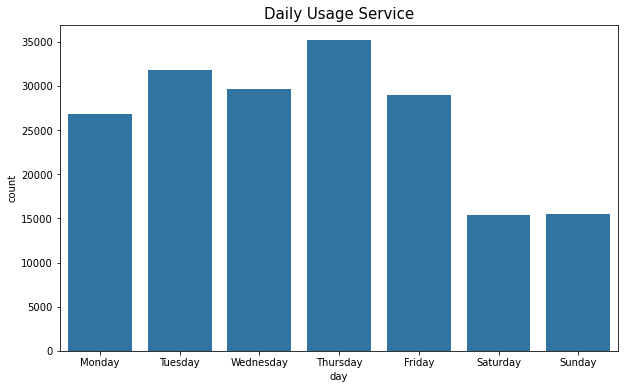

In [4]:
# Countplot bike usage based on weekday

day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
base_color = sb.color_palette()[0]

plt.figure(figsize=(10,6))
plt.title('Daily Usage Service', fontsize=15)
sb.countplot(data=df, x='day', order=day_name, color=base_color);

### 2. Service Usage by Weekday

- Customers use the service most frequently on weekends, and subscribers use it less frequently on a daily basis—only on the weekends do subscribers' trips last more than 10 minutes.

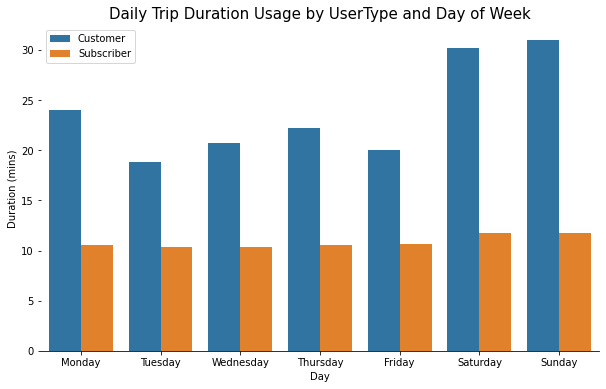

In [5]:
#trip duration
plt.figure(figsize=(10,6))
plt.title('Daily Trip Duration Usage by UserType and Day of Week', fontsize=15)
chart = sb.barplot(data=df, x='day', y='duration_min', order=day_name, hue='user_type', ci=None)

chart.set(xlabel='Day', ylabel='Duration (mins)')

# Remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

### 3. What is the average length of a trip?

- We see that the average trip duration in seconds based on the histogram is from 600 to 750 seconnds. We then convert the duration to a log scale to enhance clarity. <br>

- We see from the log scale plot that that average trip duration is about 12 minutes

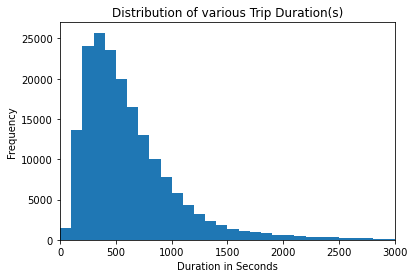

In [6]:
# Here we plot the distribution of trip durations.

binedges = np.arange(0, df['duration_sec'].max() + 100 , 100)
plt.hist(data = df , x = 'duration_sec' , bins = binedges)
plt.xlim(0,3000)
label('Duration in Seconds','Frequency','Distribution of various Trip Duration(s)')

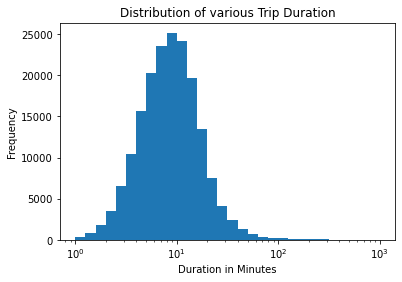

In [7]:
# Converting the trip durations from seconds to minutes 

binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.xscale('log');
label('Duration in Minutes','Frequency','Distribution of various Trip Duration')

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt